In [18]:
# Name : Zahraa Ahmed Abdelkafy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score ,  mean_absolute_error
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("C:/Users/zahra/Desktop/Oasis/Task3/datasets/raw.githubusercontent.com_amankharwal_Website-data_master_CarPrice.csv")
df = pd.DataFrame(df)
df.dropna(inplace=True)

column_types = df.dtypes
print(column_types)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [19]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

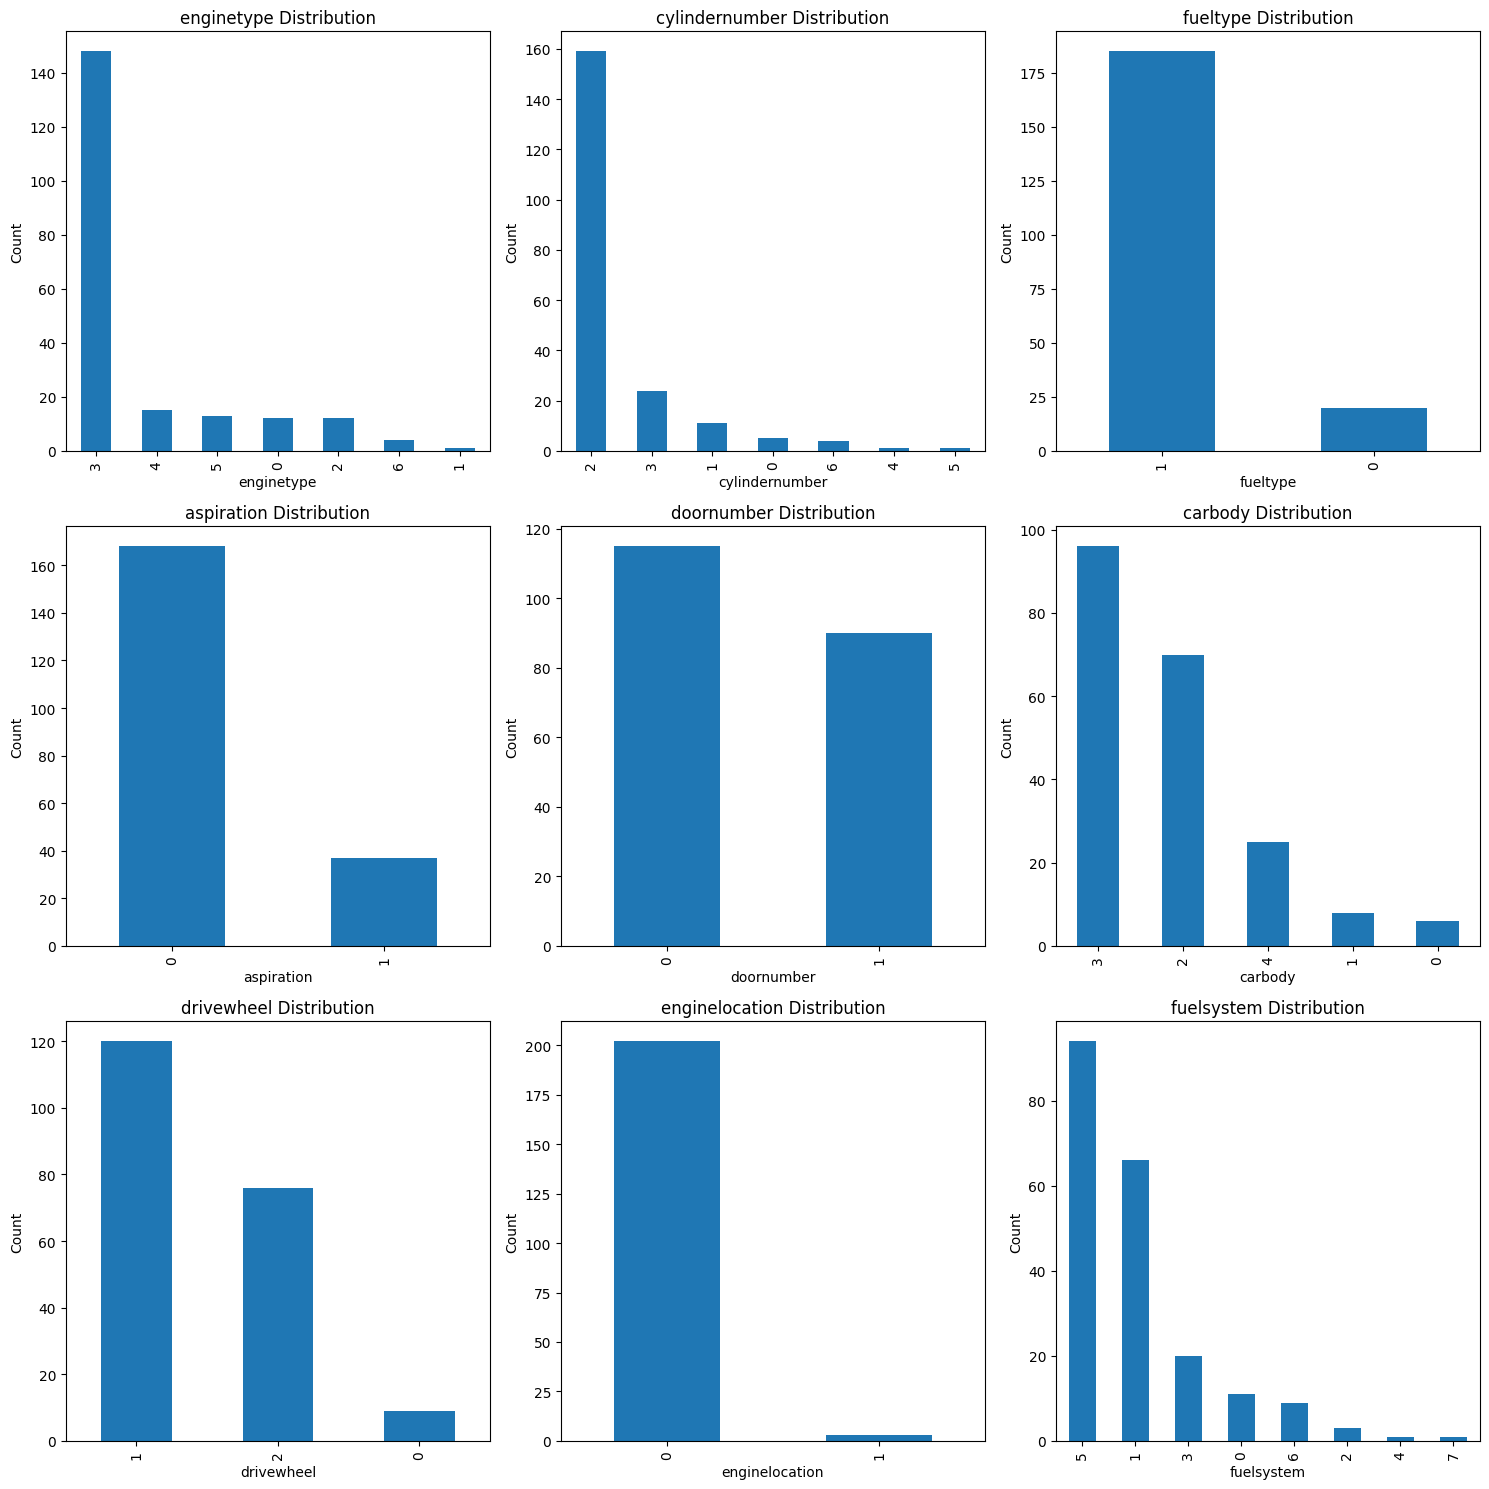

In [20]:
label_encoder = LabelEncoder()
columns_name = ['enginetype' , 'cylindernumber' , 'fueltype' ,
                'aspiration' , 'doornumber' , 'carbody' , 'drivewheel' ,
                'enginelocation' , "fuelsystem"]

for column in columns_name:
    df[column] = label_encoder.fit_transform(df[column])

# Visualization 1: Bar Plot for Categorical Variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(columns_name):
    ax = axes[i // 3, i % 3]
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

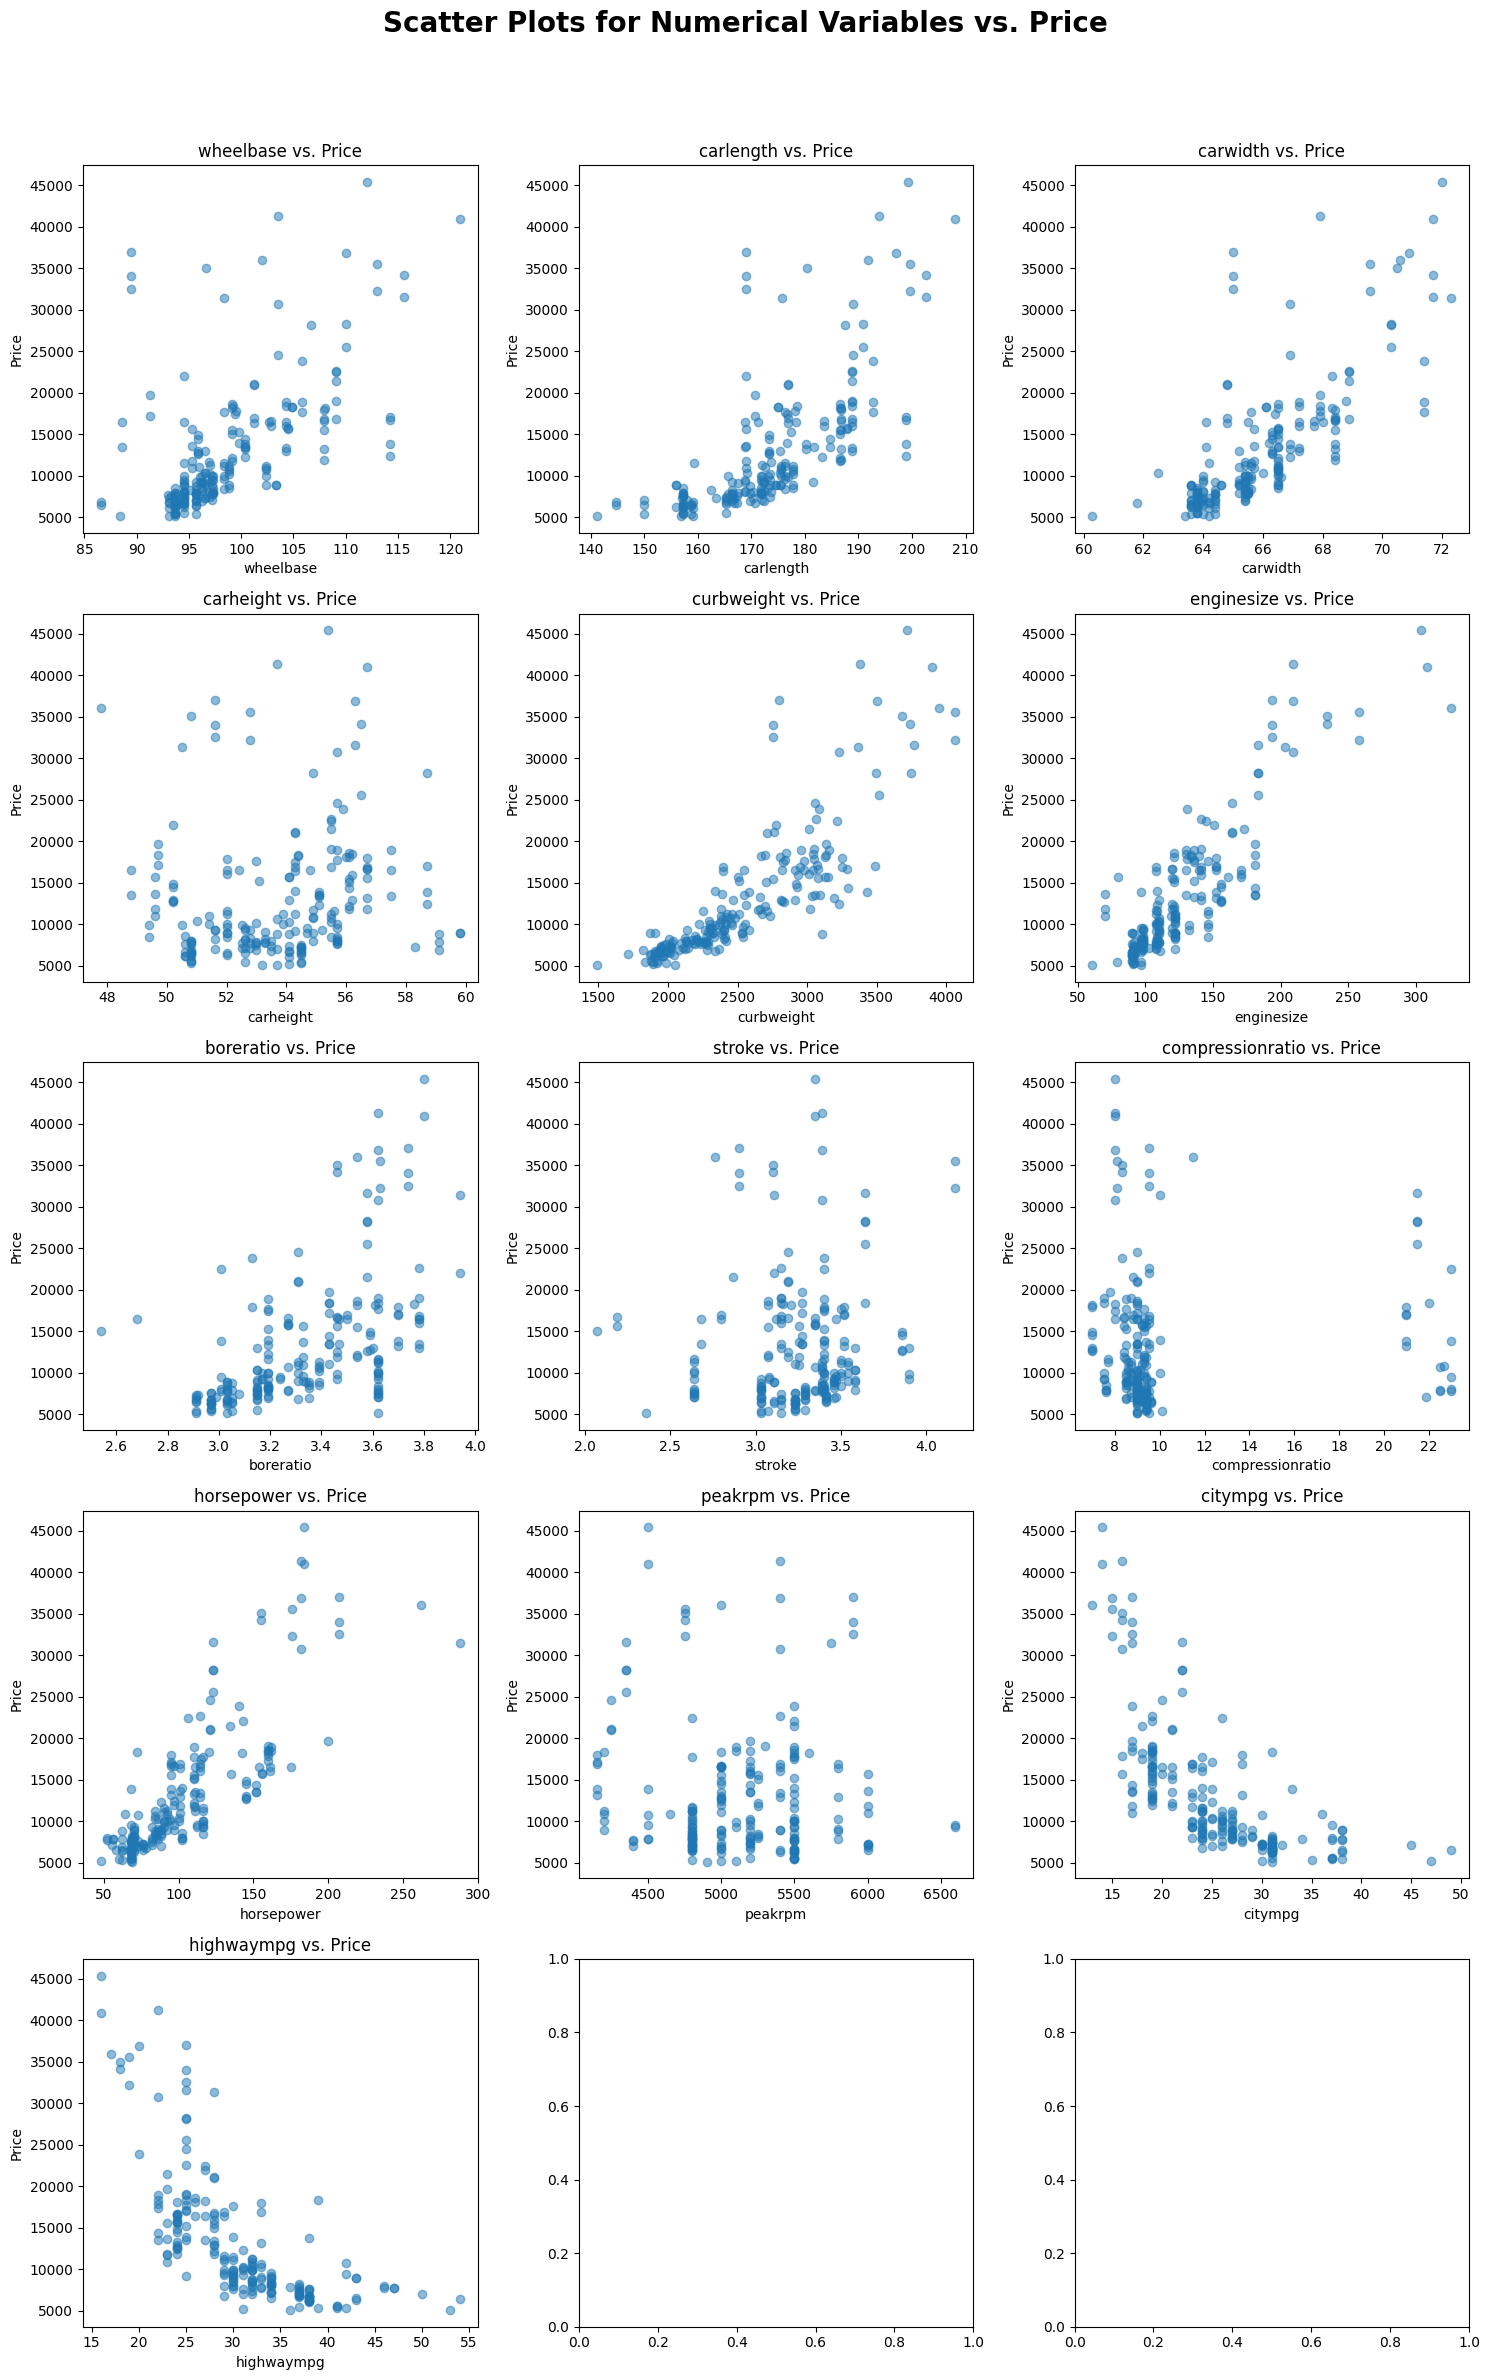

In [21]:
# Define the list of numerical columns to create scatter plots
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Calculate the number of subplot rows and columns
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # Round up to the nearest integer division
num_cols = min(num_columns, 3)

# Create a single big image for all scatter plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Plot each numerical column against 'price'
for i, column in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols]
    ax.scatter(df[column], df['price'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    ax.set_title(f'{column} vs. Price')

# Add a title to the big image
fig.suptitle('Scatter Plots for Numerical Variables vs. Price', fontsize=20, weight='bold')

# Adjust the layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the combined scatter plots
plt.show()

In [22]:
# Extract input features (X) and target variable (y)
X = df.drop(columns=['car_ID', 'CarName', 'price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model and train it on the training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 3326665.1861985945
Mean Absolute Error (MAE): 1291.502674796748
R-squared (R2): 0.9578604541657466
